In [1]:
import numpy as np
import pandas as pd
from Jesse_Funcs import blahut
import matplotlib.pyplot as plt
%matplotlib inline  
data = pd.read_pickle('Data/Partial_Reset_PCM.pkl')

In [2]:
data

,R,V
0,39847.46,1.00
1,31953.07,1.05
2,42347.76,1.10
3,53393.42,1.15
4,62352.69,1.20
5,89473.45,1.25
6,88621.06,1.30
7,92625.18,1.35
8,109822.30,1.40
9,112508.80,1.45


In [3]:
data.shape

(15200, 2)

In [4]:
a = np.linspace(3.5, 3.975, num=((3.975-3.5)/0.025)+1)
print (a)

[ 3.5    3.525  3.55   3.575  3.6    3.625  3.65   3.675  3.7    3.725
  3.75   3.775  3.8    3.825  3.85   3.875  3.9    3.925  3.95   3.975]


In [5]:
import csv
with open('Data/RRAM_test_num_key.csv') as csvfile:
    reader = csv.DictReader(csvfile)
    i = 0
    for row in reader:
        i += 1
        if i>1:
            break
        print(row['3.975'],3.975)
        RRAM_data = np.array([row['3.975'],3.975])

23861100.00 3.975


In [6]:
with open('Data/RRAM_test_num_key.csv') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        for v in a: 
            RRAM_data = np.vstack((RRAM_data,[row[str(v)],v]))

In [7]:
print (RRAM_data.shape)

(1001, 2)


In [8]:
print (RRAM_data[1000:1021])

[['27777000.00' '3.975']]


In [9]:
RRAM_data = RRAM_data[:1001]

In [10]:
print (RRAM_data)

[['23861100.00' '3.975']
 ['6190.24' '3.5']
 ['51638.38' '3.525']
 ..., 
 ['4544400.00' '3.925']
 ['197008500.00' '3.95']
 ['27777000.00' '3.975']]


In [11]:
RRAM_data = RRAM_data[1:]
print (RRAM_data)

[['6190.24' '3.5']
 ['51638.38' '3.525']
 ['539292.66' '3.55']
 ..., 
 ['4544400.00' '3.925']
 ['197008500.00' '3.95']
 ['27777000.00' '3.975']]


In [12]:
RRAM_data[0][1]

'3.5'

In [13]:
RRAM_data

array([['6190.24', '3.5'],
       ['51638.38', '3.525'],
       ['539292.66', '3.55'],
       ..., 
       ['4544400.00', '3.925'],
       ['197008500.00', '3.95'],
       ['27777000.00', '3.975']], 
      dtype='<U13')

In [14]:
RRAM_V = [float(RRAM_data[i][0]) for i in range(len(RRAM_data))]

In [15]:
RRAM_V = np.array(RRAM_V)

In [16]:
RRAM_data[:,1].shape

(1000,)

In [17]:
RRAM_R = RRAM_V

In [18]:
RRAM_R_log = np.log10(RRAM_R)

/Users/zarcone/anaconda/envs/tensorflow/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':


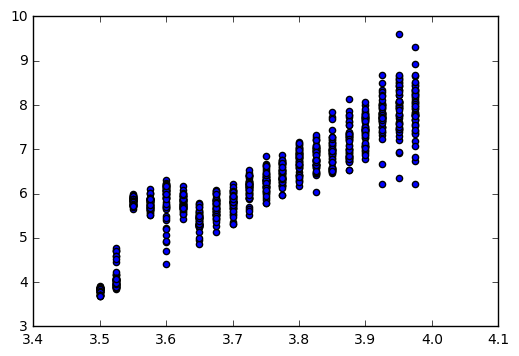

In [19]:
plt.scatter(RRAM_data[:,1],RRAM_R_log)

In [20]:
df = pd.DataFrame({"V":RRAM_data[:,1], "R":RRAM_R})

In [21]:
df

,R,V
0,6.190240e+03,3.5
1,5.163838e+04,3.525
2,5.392927e+05,3.55
3,7.163901e+05,3.575
4,1.515083e+06,3.6
5,5.365061e+05,3.625
6,6.003763e+05,3.65
7,9.253512e+05,3.675
8,8.555695e+05,3.7
9,1.900541e+06,3.725


In [22]:
RRAM_V = [float(i) for i in RRAM_data[:,1]]

In [23]:
df_2 = pd.DataFrame({"V":RRAM_V, "R":RRAM_R})

In [24]:
df_2.to_pickle('/Users/zarcone/Documents/Berkeley/Bruno_Lab/memristor/Data/RRAM_data.pkl')

In [25]:
df.to_pickle('/Users/zarcone/Documents/Berkeley/Bruno_Lab/memristor/RRAM_data')

In [26]:
RRAM_RV_data = np.array([RRAM_data[:,1],RRAM_R])

In [27]:
RRAM_RV_data.shape

(2, 1000)

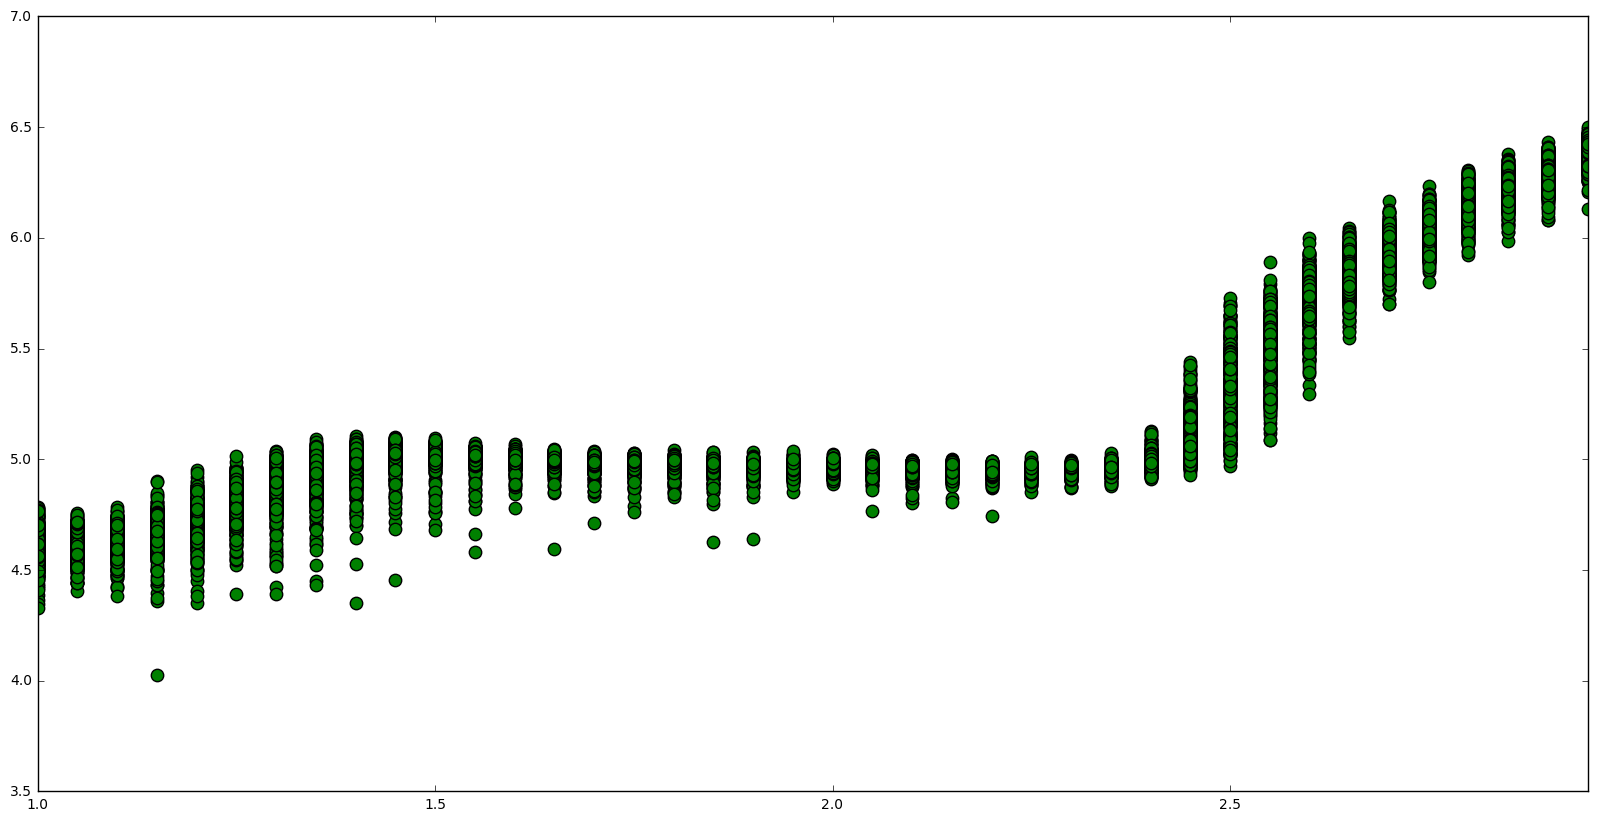

In [3]:
plt.figure(figsize=(20,10))
plt.xlim(data['V'][0],data['V'][len(data['V'])-1])
plt.scatter(data['V'],np.log10(data['R']),s=80, c='green', marker="o")

In [4]:
def range_extender(Vs,Rs,num_ext):
    num_ext = int(num_ext)
    Vs = np.array(Vs)
    Rs = np.array(Rs)
    delta_V = Vs[1]-Vs[0]
    orig_min_Vs = np.amin(Vs)
    orig_max_Vs = np.amax(Vs)
    for i in range(num_ext):
        min_Vs = np.amin(Vs)
        max_Vs = np.amax(Vs)
        min_Vs_indx = [Vs == min_Vs]
        max_Vs_indx = [Vs == max_Vs]
        Rs_min = Rs[min_Vs_indx]
        Rs_max = Rs[max_Vs_indx]
        Vs_min = Vs[min_Vs_indx] - delta_V
        Vs_max = Vs[max_Vs_indx] + delta_V
        Vs = np.append(Vs,Vs_min)
        Vs = np.append(Vs,Vs_max)
        Rs = np.append(Rs,Rs_min)
        Rs = np.append(Rs,Rs_max)
    return Vs,Rs,orig_min_Vs,orig_max_Vs

In [5]:
new_Vs,new_Rs,orig_min_Vs,orig_max_Vs = range_extender(data['V'],np.log10(data['R']),10.0)

In [6]:
print (orig_max_Vs,orig_min_Vs)

2.95 1.0


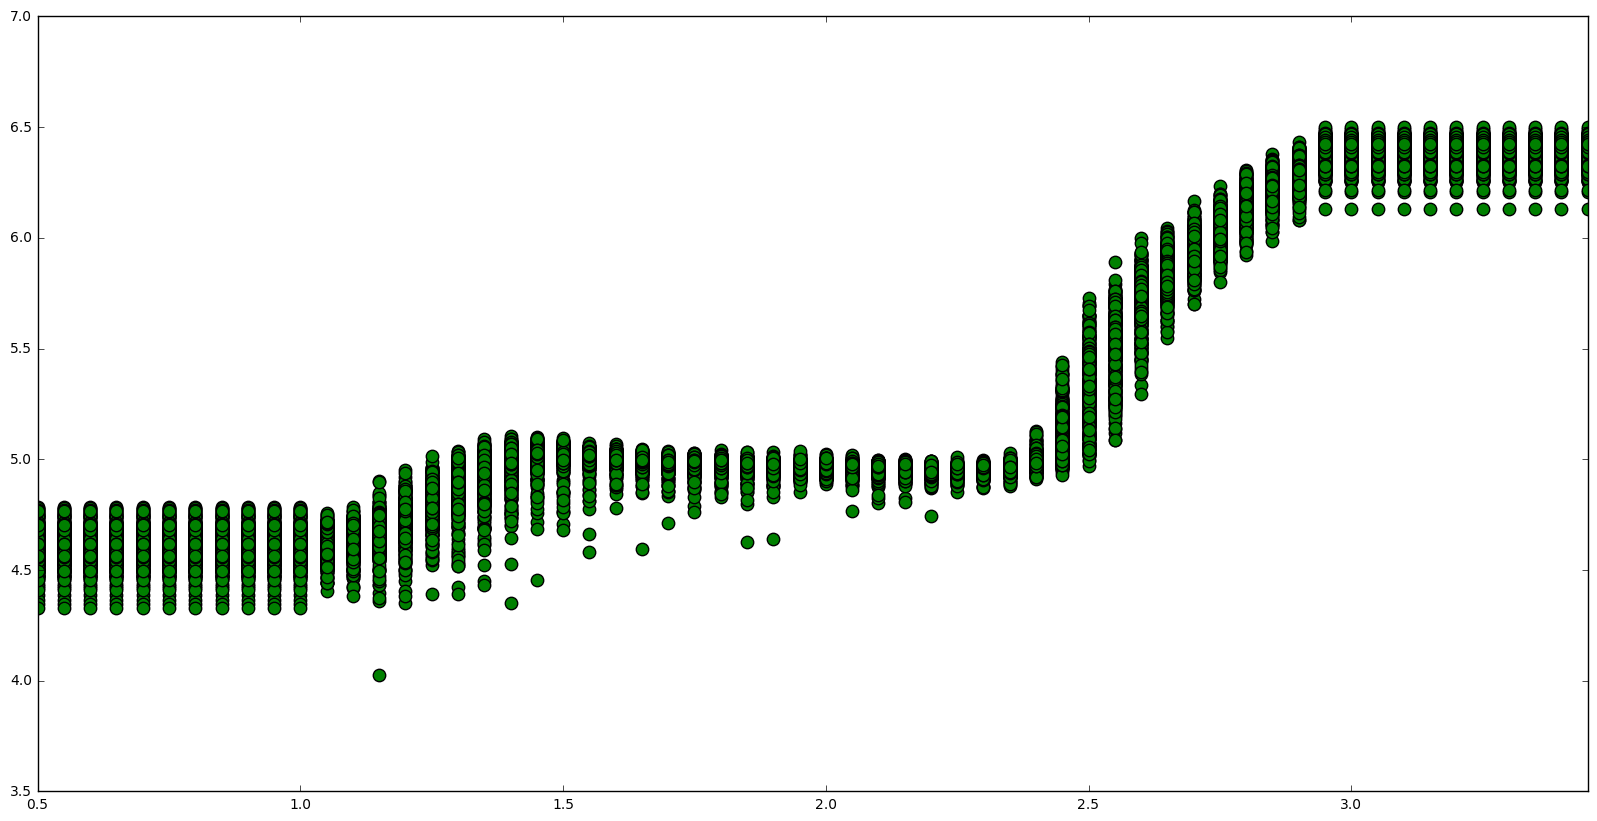

In [7]:
plt.figure(figsize=(20,10))
plt.xlim(np.amin(new_Vs),np.amax(new_Vs))
plt.scatter(new_Vs,new_Rs,s=80, c='green', marker="o")

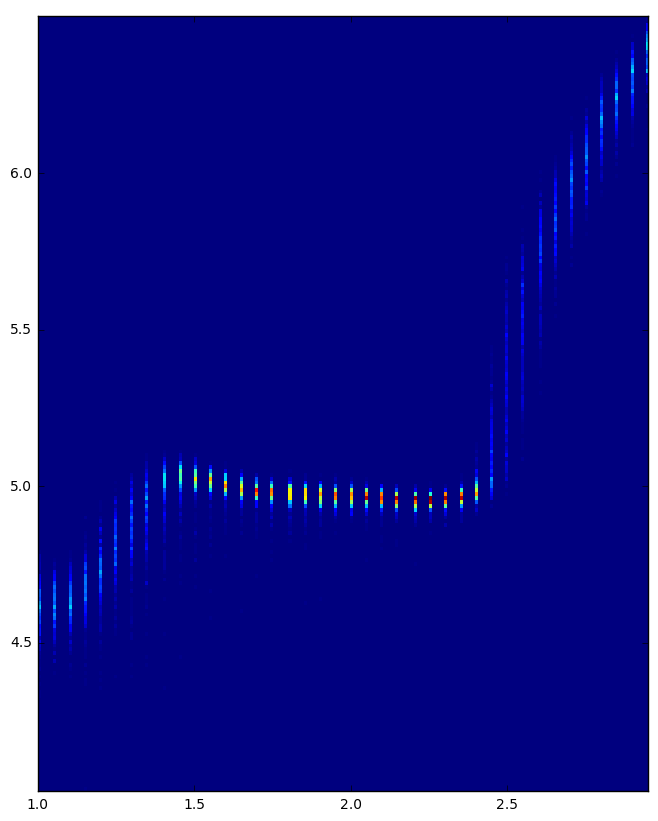

In [8]:
heatmap, xedges, yedges = np.histogram2d(data['V'],np.log10(data['R']), bins=200)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.figure(figsize=(20,10))
plt.clf()
plt.imshow(heatmap.T, extent=extent, origin='lower',interpolation='nearest')
plt.show()

In [28]:
def Capacity(V,R,resample_rate):
    P_RV, V_grid, R_grid = blahut.Q(V, R, nx=resample_rate, ny=resample_rate)
    C,Px = blahut.blahut_arimoto(P_RV)
    print ("Capacity: ", C)
    return C

In [29]:
# R = np.log10(data['R'])
R = np.array(df_2['R'])
V = np.array(df_2['V'])
resample_rate = 1500

C = Capacity(V,R,resample_rate)

3.50 Volts, 50 Points
3.52 Volts, 50 Points
3.55 Volts, 50 Points
3.58 Volts, 50 Points
3.60 Volts, 50 Points
3.62 Volts, 50 Points
3.65 Volts, 50 Points
3.67 Volts, 50 Points
3.70 Volts, 50 Points
3.73 Volts, 50 Points
3.75 Volts, 50 Points
3.77 Volts, 50 Points
3.80 Volts, 50 Points
3.83 Volts, 50 Points
3.85 Volts, 50 Points
3.88 Volts, 50 Points
3.90 Volts, 50 Points
3.92 Volts, 50 Points
3.95 Volts, 50 Points
3.98 Volts, 50 Points


/Users/zarcone/Documents/Berkeley/Bruno_Lab/memristor/Jesse_Funcs/blahut.py:62: RuntimeWarning: divide by zero encountered in log2
  d = p * np.log2(p / np.r_[q])
/Users/zarcone/Documents/Berkeley/Bruno_Lab/memristor/Jesse_Funcs/blahut.py:62: RuntimeWarning: invalid value encountered in log2
  d = p * np.log2(p / np.r_[q])
/Users/zarcone/Documents/Berkeley/Bruno_Lab/memristor/Jesse_Funcs/blahut.py:62: RuntimeWarning: invalid value encountered in multiply
  d = p * np.log2(p / np.r_[q])


Capacity:  1.85351254171


In [11]:
def channel_mod(V,R,mod_type='flat',slope=1.0):
    fig=plt.plot()
    R_means,_,_ = blahut.moments(V,R)
    V_list = list(V)
    V_array = np.array(sorted(set(V_list), key=lambda x: V_list.index(x)))
    plt.scatter(V_array,R_means)
    
    first_chunk = np.zeros(10)
    
    if mod_type == 'flat':
        second_chunk = R_means[10]-R_means[10:30]
        third_chunk = np.zeros(10)
    if mod_type == 'linear':
        second_chunk = slope*(R_means[10]-R_means[10:30])
        for i in range(len(second_chunk[:-1])):
            if (second_chunk[i+1]-second_chunk[i])<0:
                second_chunk[i+1] = slope*(V_array[i+1]-V_array[i])+second_chunk[i]
        third_chunk = np.zeros(10)
    chunks = np.append(first_chunk,second_chunk)
    chunks = np.append(chunks,third_chunk)
    adjuster = np.array([chunks]*380)
    adjuster = np.ndarray.flatten(adjuster)
    
    R_new = R+adjuster
    indx = [V==2.45]
    R_new[indx] = R_new[indx]-0.1
    indx = [V==2.5]
    R_new[indx] = R_new[indx]+0.1
    R_new_means,_,_ = blahut.moments(V,R_new)
    
    plt.scatter(V_array,R_new_means,c='red')
    plt.legend(("Original Channel: 2.68 Bits","Modified Channel: 3.12 Bits"),loc='upper left')
    plt.xlabel(r'Voltage (V)', fontsize=12)
    plt.ylim(4.5,6.5)
    plt.xlim(1.0,3.0)
    plt.ylabel(r'$\log _{ 10 }{ \left( R \right)  }$ ', fontsize=18)
    file_name = 'RV_with_CAP'
    plt.savefig(file_name+'.png')
    return R_new,V_array

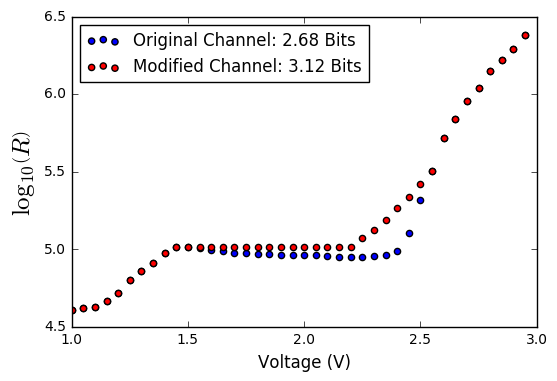

In [12]:
R_new,V_array = channel_mod(V,np.log10(R),'linear',1.05)

In [13]:
C_new = Capacity(V,R_new,resample_rate)

1.00 Volts, 380 Points
1.05 Volts, 380 Points
1.10 Volts, 380 Points
1.15 Volts, 380 Points
1.20 Volts, 380 Points
1.25 Volts, 380 Points
1.30 Volts, 380 Points
1.35 Volts, 380 Points
1.40 Volts, 380 Points
1.45 Volts, 380 Points
1.50 Volts, 380 Points
1.55 Volts, 380 Points
1.60 Volts, 380 Points
1.65 Volts, 380 Points
1.70 Volts, 380 Points
1.75 Volts, 380 Points
1.80 Volts, 380 Points
1.85 Volts, 380 Points
1.90 Volts, 380 Points
1.95 Volts, 380 Points
2.00 Volts, 380 Points
2.05 Volts, 380 Points
2.10 Volts, 380 Points
2.15 Volts, 380 Points
2.20 Volts, 380 Points
2.25 Volts, 380 Points
2.30 Volts, 380 Points
2.35 Volts, 380 Points
2.40 Volts, 380 Points
2.45 Volts, 380 Points
2.50 Volts, 380 Points
2.55 Volts, 380 Points
2.60 Volts, 380 Points
2.65 Volts, 380 Points
2.70 Volts, 380 Points
2.75 Volts, 380 Points
2.80 Volts, 380 Points
2.85 Volts, 380 Points
2.90 Volts, 380 Points
2.95 Volts, 380 Points


/Users/zarcone/Documents/Berkeley/Bruno_Lab/memristor/Jesse_Funcs/blahut.py:62: RuntimeWarning: divide by zero encountered in log2
  d = p * np.log2(p / np.r_[q])
/Users/zarcone/Documents/Berkeley/Bruno_Lab/memristor/Jesse_Funcs/blahut.py:62: RuntimeWarning: invalid value encountered in log2
  d = p * np.log2(p / np.r_[q])
/Users/zarcone/Documents/Berkeley/Bruno_Lab/memristor/Jesse_Funcs/blahut.py:62: RuntimeWarning: invalid value encountered in multiply
  d = p * np.log2(p / np.r_[q])
/Users/zarcone/Documents/Berkeley/Bruno_Lab/memristor/Jesse_Funcs/blahut.py:62: RuntimeWarning: divide by zero encountered in true_divide
  d = p * np.log2(p / np.r_[q])
/Users/zarcone/Documents/Berkeley/Bruno_Lab/memristor/Jesse_Funcs/blahut.py:62: RuntimeWarning: invalid value encountered in true_divide
  d = p * np.log2(p / np.r_[q])


Capacity:  3.11568230287


In [14]:
def hists(ax,R_vals,R_bins):
    ax.hist(R_vals,bins=R_bins)

def R_densities(data,V_bins,plot_grid):
    Vs = data['V']
    Rs = data['R']
    num_smpls = np.sum(np.array([Vs==V_bins[0]])[0])
    Rs_array = np.zeros([len(V_bins),num_smpls])
    for i in range(len(V_bins)):
        Vs_indx = np.array([Vs==V_bins[i]])
        R_dens = np.log10(Rs[Vs_indx[0]])
        R_dens = np.array(R_dens)
        Rs_array[i] = R_dens
        
    Rs_array = Rs_array.reshape(plot_grid[0],plot_grid[1],num_smpls)
    
    fig, axes = plt.subplots(plot_grid[0], plot_grid[1],figsize=(15,10))
    i=0
    for row in axes:
        j=0
        for ax in row:
            hists(ax,Rs_array[i][j],40)
            j+=1
        i+=1
    plt.tight_layout()

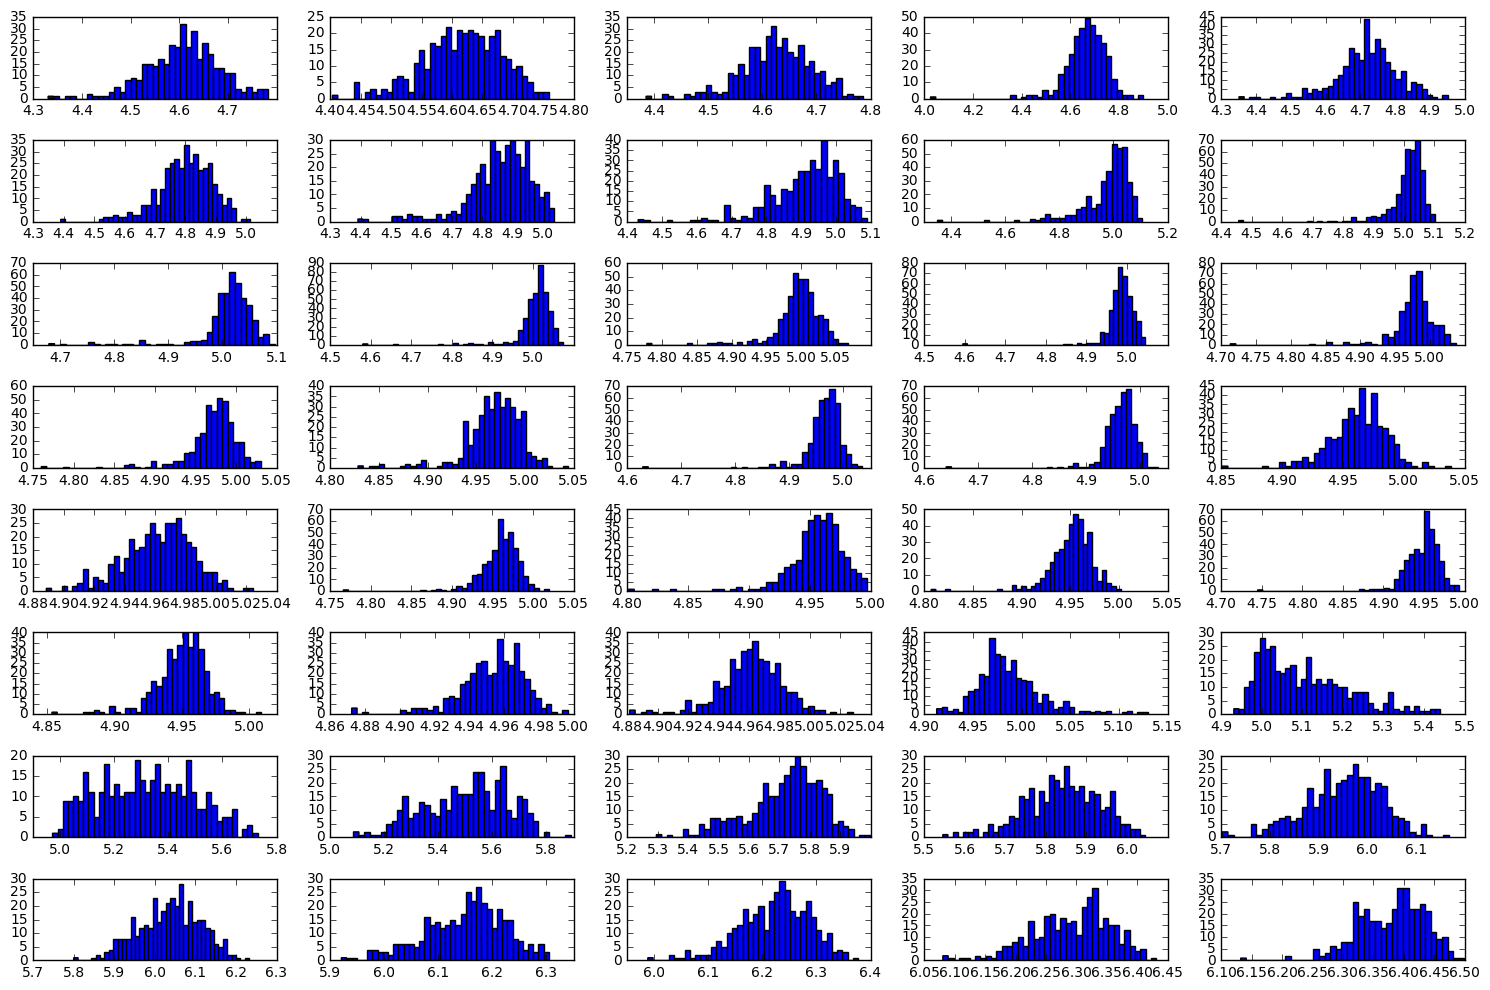

In [15]:
V_list = list(data['V'])
V_bins = sorted(set(V_list), key=lambda x: V_list.index(x))
plot_grid = [8,5]

R_densities(data,V_bins,plot_grid)